# 911 calls capstone project  
In this we will be analyzing some 911 call data.The data contains the following field

# Import Numpy and Pandas

In [2]:
import numpy as np
import pandas as pd

# Import  visualization libraries ans set%matplotlib inline.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read csv file as a dataframe  called df

In [4]:
# Read csv files in pandas
# csv = commaa separeted value
df = pd.read_csv("C:\\Users\\HP\\Downloads\\911.csv")
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1


# check the info of df()


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289240 entries, 0 to 289239
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        289240 non-null  float64
 1   lng        289240 non-null  float64
 2   desc       289240 non-null  object 
 3   zip        253942 non-null  float64
 4   title      289240 non-null  object 
 5   timeStamp  289240 non-null  object 
 6   twp        289137 non-null  object 
 7   addr       289240 non-null  object 
 8   e          289240 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 19.9+ MB


In [6]:
# Results= we can see total 289240 enteries on 911 call.in this we also noticed that zip,twp has some of the missing value
# and e is dum variable here,wereas  lat,lng,desc,title,timestamp,addr have same number of entries

# check the head of df

In [7]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1


# what are the 5 zipcodes for 911 calls?

In [8]:
df['zip'].head(5)

0    19525.0
1    19446.0
2    19401.0
3    19401.0
4        NaN
Name: zip, dtype: float64

In [9]:
df['zip'].value_counts().head(5)
# this are top 5 zipcode for 911 calls

19401.0    19821
19464.0    19276
19403.0    14524
19446.0    13939
19406.0     9601
Name: zip, dtype: int64

# what are the top 5 township (twp) for 911 calls



In [10]:
df['twp'].value_counts().head(5)

LOWER MERION    24826
ABINGTON        17820
NORRISTOWN      16546
UPPER MERION    15288
CHELTENHAM      13359
Name: twp, dtype: int64

# take a look  at the 'title' column .how many unique tittle codes are there?

In [11]:
df['title'].nunique()

131

# take a look at the 'title' column,which are the unique title codes are there?


In [12]:
df['title'].unique()

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

# creating new feature
**In the titles column there are 'Reasons/Department' specified before the title codes 
these are  EMS,Fire and traffic .Use.apply() with a custom lambda function to create a new column called 'Reason' that contains the string value**
**for eg if the title column  value is EMS:BACKPAIN,the reason  column should values should be EMS

In [13]:
s1 = 'EMS: BACKPAINS/INJURY'
s1.split(":")

['EMS', ' BACKPAINS/INJURY']

In [14]:
s1 = 'EMS : BACKPAINS/INJURY'
s1.split(":")[0]

'EMS '

In [15]:
df["REASON"] = df['title'].apply(lambda s:s.split(':')[0])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,REASON
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


# creating new feature 
**in this title column there are "Reason/Deartment " specified before the title codes.These are EMS , Fire andTraffic. Use.apply() with a custom lambda  expression  to create a new column  called 'department'  that contains this value string

In [16]:
df['Department'] = df['title'].apply(lambda s :s.split(":")[1])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,REASON,Department
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS


# what is the most common reason  for a 911 call based off of this new column?

In [17]:
df['REASON']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
289235        EMS
289236       Fire
289237    Traffic
289238    Traffic
289239    Traffic
Name: REASON, Length: 289240, dtype: object

In [18]:
df['REASON'].value_counts()

EMS        144362
Traffic    101889
Fire        42989
Name: REASON, dtype: int64

In [19]:
# results - here we can see that there are total 3 reason because of which we get number of calls on 911
# the three reasons are EMS ,traffic,fire in this we can see the highest number of entries is for EMS 
# and lowest is for Fire so suppose we have to give conclusion than we can say that government should provide more 
# medical facilities  so that Emergency medical call should be less

# Now use Seaborn to create a countplot for 911 calls by reason 

<AxesSubplot:xlabel='REASON', ylabel='count'>

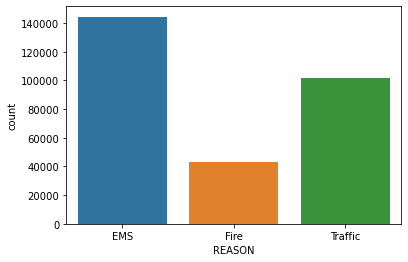

In [20]:
sns.countplot(x='REASON',data = df)

# Now let us begin to focus on time information.what is the data type of the object in timestamp column?

In [21]:
df['timeStamp'][0]

'2015-12-10 17:10:52'

In [22]:
print(df['timeStamp'][0])
print(type(df['timeStamp'][0]))

2015-12-10 17:10:52
<class 'str'>


# you should have seen that these timestamp are still strings.use pd.to_datetime  to convert the column from strings to data type object

In [23]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])
print(df['timeStamp'][0])
print(type(df['timeStamp'][0]))

2015-12-10 17:10:52
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [24]:
# result- here the numerical value cannot be written in the string therefore pd.to_datetime is used so that
# we can read timestamp in numerical format

# you can now glab  specific  attribuations from a datetime object by calling them

In [25]:
print(df['timeStamp'][0])
print(df['timeStamp'][0].hour)
print(df['timeStamp'][0].minute)
print

2015-12-10 17:10:52
17
10


<function print>

In [26]:
print(df['timeStamp'][0].year)

2015


In [27]:
print(df['timeStamp'][1].year)

2015


In [28]:
print(df['timeStamp'][0].month)

12


In [29]:
print(df['timeStamp'][0].second)

52


result- how it helped us as we cannot read timestamp in str so we converted it into 
numerical data so now we can easily predict date ,time,month,second

# you can use jupyters tab method to explore the various attributes you can call .Now that  the timestamp coloumn are actually data time object .use apply () to create  3 new column  called hour,month, and day of weeek .you can create these column  based on the timestamp  column

In [30]:
df['Hour']=df['timeStamp'].apply(lambda x:x.hour)
df['Hour'].head(3)

0    17
1    17
2    14
Name: Hour, dtype: int64

In [31]:
df['month']=df['timeStamp'].apply(lambda x:x.month)
df['month'].head(3)

0    12
1    12
2    12
Name: month, dtype: int64

In [32]:
df['day of week']=df['timeStamp'].apply(lambda x:x.dayofweek)
df['day of week'].head(3)

0    3
1    3
2    3
Name: day of week, dtype: int64

In [33]:
df['Hour']=df['timeStamp'].apply(lambda x:x.hour)
df['month']=df['timeStamp'].apply(lambda x:x.month)
df['day of week']=df['timeStamp'].apply(lambda x:x.dayofweek)


In [34]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,REASON,Department,Hour,month,day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,14,12,3


# notice how the day of week is in integer 0-6.Use the dmap() with this dictionary to map the actual string  names to te day of week


In [73]:
dmap={0:"mon",1:"tue",2:"wed",3:"thur",4:"fri",5:"sat",6:"sun"}
df["Day of week"]=df['day of week'].map(dmap)

In [74]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,REASON,Department,Hour,month,day of week,Date,Day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,17,12,3,2015-12-10,thur
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,17,12,3,2015-12-10,thur
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,14,12,3,2015-12-10,thur


# now use seaborn to create the a countplot of the month of column  withe the hue based off of the reason  column

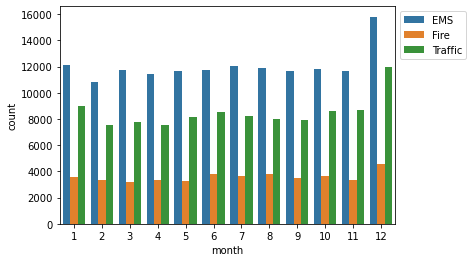

In [38]:
sns.countplot(x='month', data = df ,hue ='REASON')
plt.legend(bbox_to_anchor =(1,1))

In [39]:
result=wecan see in contplot that the highest graph is of EMS
Average of traffic is around 10000
average of fire is 40000
and the highest graph can be seen in month end of EMS,FIRE,TRAffic



SyntaxError: invalid syntax (<ipython-input-39-8b8b3a9c9218>, line 1)

# Now to create groupby object called as bymonth ,where you group the dataframe by the month coulmn and use the count() method for aggregation .use the Head() menthod on this returned dataframe


In [41]:
bymonth=df.groupby('month').count()
bymonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,REASON,Department,Hour,day of week
month,,,,,,,,,,,,,
1,24701,24701,24701,21877,24701,24701,24692,24701,24701,24701,24701,24701,24701
2,21663,21663,21663,19161,21663,21663,21658,21663,21663,21663,21663,21663,21663
3,22743,22743,22743,20160,22743,22743,22732,22743,22743,22743,22743,22743,22743
4,22343,22343,22343,19671,22343,22343,22336,22343,22343,22343,22343,22343,22343
5,23093,23093,23093,20254,23093,23093,23082,23093,23093,23093,23093,23093,23093
6,24065,24065,24065,21070,24065,24065,24058,24065,24065,24065,24065,24065,24065
7,23856,23856,23856,20940,23856,23856,23850,23856,23856,23856,23856,23856,23856
8,23657,23657,23657,20739,23657,23657,23646,23657,23657,23657,23657,23657,23657
9,23001,23001,23001,20014,23001,23001,22993,23001,23001,23001,23001,23001,23001


# Now create the simle plot off the dataframe indicating the count of calls permonth

<AxesSubplot:xlabel='month'>

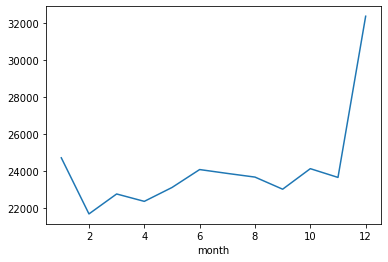

In [50]:
# dont use zip twp and addr columns as they have missing values remaining any column can be used
bymonth['REASON'].plot()

In [ ]:
Reasult=we can do the prediction that the calls are minimum in the month of febrauary and the higest calls are seen
in the month end  that is november and in december 

In [51]:
bymonth.reset_index()

,month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,REASON,Department,Hour,day of week
0,1,24701,24701,24701,21877,24701,24701,24692,24701,24701,24701,24701,24701,24701
1,2,21663,21663,21663,19161,21663,21663,21658,21663,21663,21663,21663,21663,21663
2,3,22743,22743,22743,20160,22743,22743,22732,22743,22743,22743,22743,22743,22743
3,4,22343,22343,22343,19671,22343,22343,22336,22343,22343,22343,22343,22343,22343
4,5,23093,23093,23093,20254,23093,23093,23082,23093,23093,23093,23093,23093,23093
5,6,24065,24065,24065,21070,24065,24065,24058,24065,24065,24065,24065,24065,24065
6,7,23856,23856,23856,20940,23856,23856,23850,23856,23856,23856,23856,23856,23856
7,8,23657,23657,23657,20739,23657,23657,23646,23657,23657,23657,23657,23657,23657
8,9,23001,23001,23001,20014,23001,23001,22993,23001,23001,23001,23001,23001,23001
9,10,24113,24113,24113,20931,24113,24113,24109,24113,24113,24113,24113,24113,24113


In [ ]:
# result= in this we can see new column of reset month is being added


# Now see f you can use Seaborns Implot() to create a linear fit on the number of calls per month.Keep in mind you may to reset the index to a column

<Figure size 1080x1080 with 0 Axes>

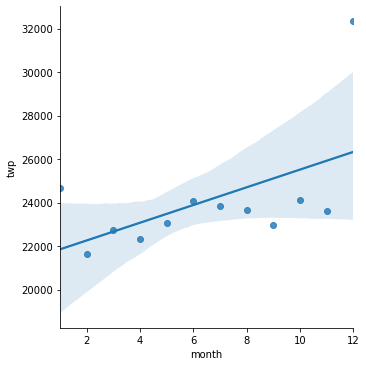

In [57]:
plt.figure(figsize=(15,15))
sns.lmplot(x='month',y='twp',data=bymonth.reset_index())


In [ ]:
# result- the line is called as linear fit line with equation of y=mx+c which will always come closed to all the posible point
# here aso we can see that in x is of month and y is of count as we have already concluded that feb mein the results are down 
# of the calls and highest in the month of december similary we can see it in the graph


# Now create new column called as 'Date' that contains the date from the timestamp column .You will need to use apply  along with the .date() method.

In [60]:
df['Date']=df['timeStamp'].apply(lambda x:x.date())
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,REASON,Department,Hour,month,day of week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,17,12,3,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,17,12,3,2015-12-10


# Now let us move on to creating heatmaps with seaborn and our data .we will first need  to restructure the data frame so that columns become the hour and index become the day of week .there are  lots of ways to do this.but i would recommende trying to combine groupby with the (unstack)

In [88]:
dayHour = df.groupby(['Day of week','Hour']).count()['lat']
dayHour

Day of week  Hour
fri          0        786
             1        688
             2        617
             3        576
             4        540
                     ... 
wed          19      2038
             20      1834
             21      1522
             22      1261
             23       994
Name: lat, Length: 168, dtype: int64

In [89]:
dayHour = dayHour.unstack()
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of week,,,,,,,,,,,,,,,,,,,,,
fri,786,688,617,576,540,695,1136,1854,2169,2252,...,2729,2977,3114,3027,2405,2199,1890,1647,1559,1229
mon,810,638,577,524,611,761,1155,1954,2425,2496,...,2468,2714,2796,2833,2437,1976,1714,1345,1165,895
sat,992,867,808,699,644,686,842,1118,1450,1860,...,2342,2294,2268,2231,2185,2044,1771,1619,1429,1313
sun,1031,922,868,716,629,658,801,1050,1324,1665,...,2033,1925,1970,1984,1947,1817,1569,1376,1064,979
thur,771,616,659,526,516,722,1215,1984,2305,2405,...,2592,2752,2729,3018,2447,1998,1748,1554,1235,1015
tue,774,635,570,537,557,771,1217,2007,2537,2481,...,2638,2846,3018,2970,2573,2044,1771,1516,1187,918
wed,715,656,564,563,501,716,1256,2061,2357,2405,...,2631,2771,3025,3115,2490,2038,1834,1522,1261,994


# Now create heatmap using new dataframe

<AxesSubplot:xlabel='Hour', ylabel='Day of week'>

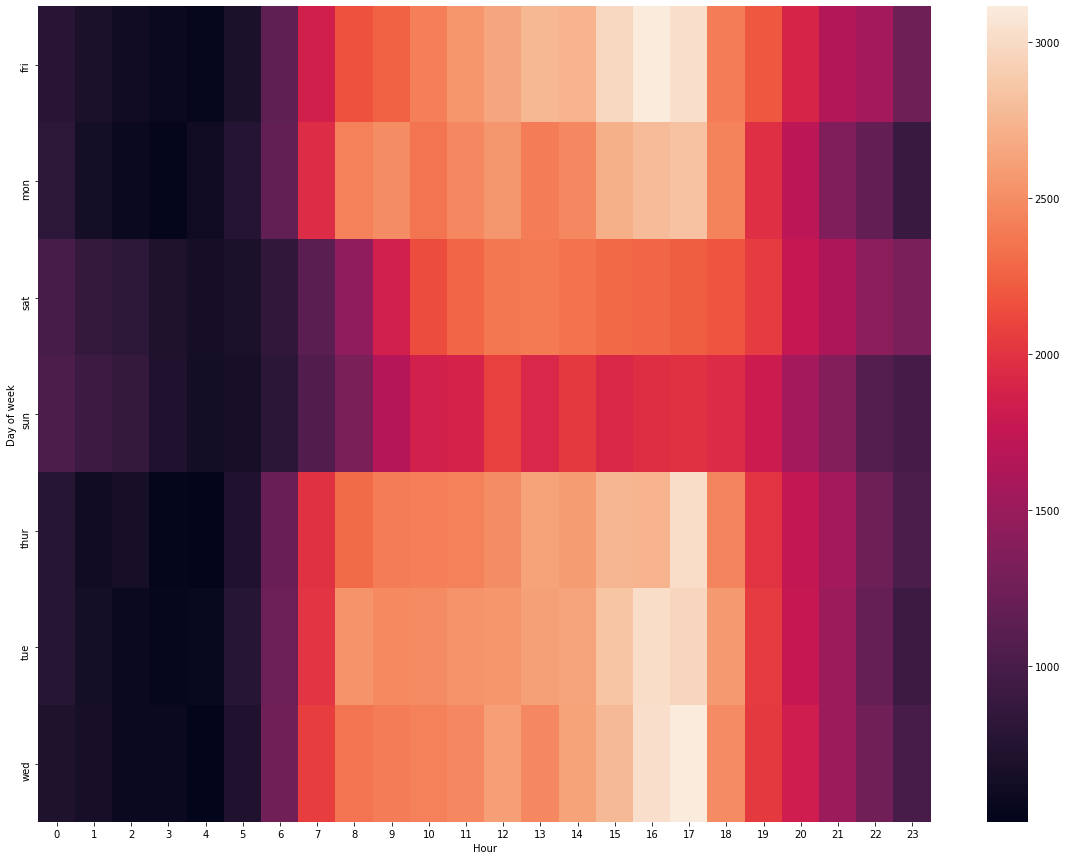

In [92]:
plt.figure(figsize=(20,15))
sns.heatmap(dayHour)

In [ ]:
# result- in graph we can see that between 7am to 7 pm in light shade upto range 3000 the number of call is
# high becoz its a office time so the EMS and traffic we be nodoubt greater 
# while in other case we can see that the dark shade which is in the range 0 to 1200 is from 12 am to 6 am
# whereas we can also see that sunday to satuday their are most probably dark shade which says tha the calls on 911 are less as 
# their weekends

# Now create clustermap using this dataframe

<Figure size 1440x1080 with 0 Axes>

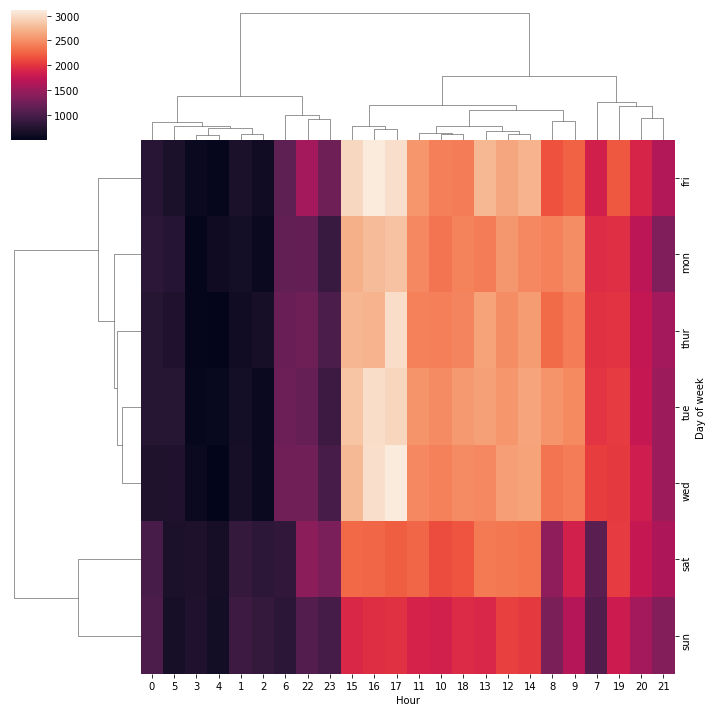

In [94]:
plt.figure(figsize=(20,15))
sns.clustermap(dayHour)

In [ ]:
this clustermap is grouping the data
in this cluster map it has divided all the values in 3 parts with are similar to each other
means based on values it has group like you can see that as 0,1,2,3,4,5,6,22,23 the call are less becoz 
of less traffic jam at that time which is showm in the dark shade.where as at 15,16,17,11,10,18,13,12,14  the calls are high 
becoz there is traffic jam at that time so EmS wll be high which is shown in the ligt shade in the 